# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import norm
from scipy.stats import ttest_1samp

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
x=range(0,7)
lista=[]
def rolling(y):
    rolling_times=input("")
    for i in range(0,int(rolling_times)):
        acumulador=+1
        if acumulador==rolling_times:
            break
        else:
            lista.append(x[random.randint(0,6)])
    return pd.DataFrame(lista, columns=['dice']) 

In [3]:
dice=(rolling(x))

10


#### 2.- Plot the results sorted by value.

In [4]:
# your code here
dice=dice.sort_values(by='dice')
dice

,dice
9,0
5,1
3,2
0,3
4,3
6,5
7,5
1,6
2,6
8,6


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [5]:
# your code here
def feq_dis(x):
    value_counts=x['dice'].value_counts()
    x=pd.DataFrame(value_counts)
    return x.to_dict()['dice']

{6: 3, 5: 2, 3: 2, 2: 1, 1: 1, 0: 1}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54fb13d690>]],
      dtype=object)

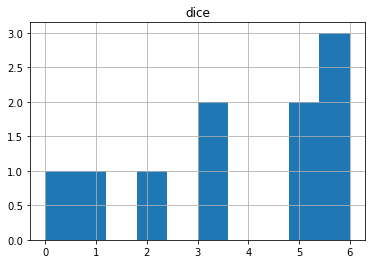

In [6]:
print(feq_dis(dice))
dice.hist()

### Answer 

Both represent the same data and are sorted by value. The main differences are that the histogram is more visual and arranges values accumulated by frequency saving the time of counting the repeated values

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here
lista=[y for i in dice.values for y in i]
def mean1(x):
    z=0
    for i in x:
        z=z+i
    return z/len(dice)

In [9]:
print(mean1(lista))

3.7


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
# your code here
def feq_dis(x):
    value_counts=x['dice'].value_counts()
    x=pd.DataFrame(value_counts)
    return x.to_dict()['dice']

def mean2(x):
    x=feq_dis(x)
    lista=[((list(x.keys())[i])*(list(x.values())[i])) for i in range(0,len(x))]
    return sum(lista)/len(dice)                        

In [11]:
print('The frequency distribution is:',(feq_dis(dice)),'being the keys of the dictionay the values and the values the Nº of times it is repeated in the df')
print('The mean is:', mean2(dice))

The frequency distribution is: {6: 3, 5: 2, 3: 2, 2: 1, 1: 1, 0: 1} being the keys of the dictionay the values and the values the Nº of times it is repeated in the df
The mean is: 3.7


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [12]:
lista=[y for i in dice.values for y in i]

In [13]:
# your code here
def median1(x):
    if len(x)%2==0:
        return (x[(len(x)//2)] + x[(len(x)//2)-1])/2
    else:
        return x[(len(x)//2)]

In [14]:
print(median1(lista))

4.0


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [46]:
# your code here
def Q1(x):
    return median1(x[0:(len(x)//2)+1])
    
def Q3(x):
    return median1(x[(len(x)//2):-1])

In [47]:
print('Quantile 1 is all values below:',Q1(lista))
print('Quantile 2 is all values between:',Q1(lista), 'and', median1(lista))
print('Quantile 3 is all values between:',median1(lista), 'and', Q3(lista))
print('Quantile 4 is all values above:', Q3(lista))

Quantile 1 is all values below: 2.5
Quantile 2 is all values between: 2.5 and 4.0
Quantile 3 is all values between: 4.0 and 5.5
Quantile 4 is all values above: 5.5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [17]:
# your code here
dice=pd.read_csv('../data/roll_the_dice_hundred.csv')

In [18]:
dice=dice.sort_values(by='value')
dice

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


### Answer

Even though, this dataset is more balanced, values are not evenly distributed throughout the dataset as the higher values, be it 4,5 and 6 show a higher frequency

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [20]:
# your code here
mean1(dice['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [21]:
# your code here
dice.rename(columns={'value':'dice'},inplace=True)
mydict=feq_dis(dice)
mydict

{6: 23, 4: 22, 2: 17, 3: 14, 5: 12, 1: 12}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

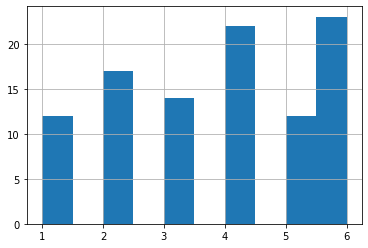

In [22]:
# your code here
dice['dice'].hist()

### Asnwer 

The values are slightly concentrated in >4, which is reflected in the mean, who takes a value greater than the median

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

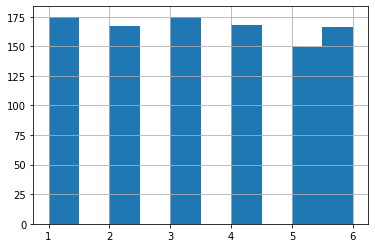

In [24]:
# your code here
dice=pd.read_csv('../data/roll_the_dice_thousand.csv')
dice['value'].hist()

In [25]:
mean1(dice['value'])

3.447

### Answer

This is a rather balanced and symmetric dataframe as we see in the plot. Hence, it is not suprising that the mean takes a value almost equal to the median

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

{39.0: 45, 41.0: 36, 30.0: 34, 35.0: 33, 43.0: 32, 42.0: 32, 36.0: 31, 38.0: 30, 32.0: 30, 37.0: 30, 34.0: 29, 45.0: 29, 40.0: 27, 29.0: 26, 27.0: 25, 31.0: 24, 46.0: 23, 44.0: 23, 26.0: 23, 33.0: 22, 28.0: 20, 25.0: 19, 49.0: 19, 48.0: 19, 24.0: 18, 47.0: 17, 23.0: 17, 22.0: 16, 50.0: 16, 56.0: 15, 21.0: 14, 52.0: 14, 20.0: 13, 54.0: 13, 55.0: 13, 53.0: 12, 19.0: 11, 12.0: 11, 14.0: 10, 17.0: 10, 51.0: 9, 15.0: 8, 16.0: 8, 59.0: 8, 18.0: 7, 58.0: 7, 63.0: 7, 57.0: 7, 13.0: 6, 8.0: 5, 60.0: 4, 67.0: 4, 62.0: 4, 68.0: 3, 66.0: 3, 11.0: 3, 10.0: 3, 61.0: 2, 9.0: 2, 5.0: 2, 6.0: 2, 65.0: 2, 2.0: 2, 1.0: 2, 64.0: 2, 4.0: 1, 82.0: 1, 70.0: 1, 71.0: 1, 7.0: 1, 69.0: 1, 73.0: 1}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54fa767690>]],
      dtype=object)

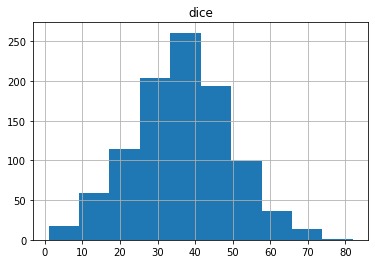

In [27]:
# your code here
age1=pd.read_csv('../data/ages_population.csv')
age1.rename(columns={'observation':'dice'},inplace=True)
print(feq_dis(age1))
age1.hist()

### Answer

Looking at the plot I would assert that the mean would fall between 30 and 40 as it looks like a very symmetric dataframe and the mentioned range would be the center. For the standard deviation, I would say that it should be between 15 and 20 backing this statement with the same argument

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [29]:
# your code here
print('The mean equals:', np.mean(age1), 'which is not deviated from my guess')
print('The standard deviation equals:', np.std(age1), 'which is not deviated either from my guess')

The mean equals: dice    36.56
dtype: float64 which is not deviated from my guess
The standard deviation equals: dice    12.81009
dtype: float64 which is not deviated either from my guess


### Answer 

The result do not surprise me

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

{28.0: 139, 27.0: 125, 26.0: 120, 29.0: 115, 25.0: 98, 30.0: 90, 24.0: 78, 31.0: 61, 23.0: 41, 22.0: 35, 32.0: 31, 33.0: 22, 21.0: 17, 20.0: 13, 34.0: 7, 35.0: 3, 19.0: 3, 36.0: 2}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54fa701750>]],
      dtype=object)

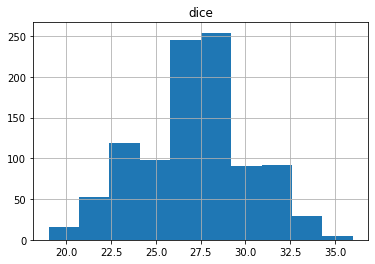

In [31]:
# your code here
age2=pd.read_csv('../data/ages_population2.csv')
age2.rename(columns={'observation':'dice'},inplace=True)
print(feq_dis(age2))
age2.hist()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

### Answer 

In this case, the histogram looks less symmetric and therefore, it is harded to individualized its mean and standard deviation in just a first glimpse

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [33]:
# your code here
print(np.mean(age2))
print(np.std(age2))

dice    27.155
dtype: float64
dice    2.968329
dtype: float64


### Answer 

Apparently,the mean is very close to the median - 27, which is a property more common in symmetric distributions. I was expecting a value that would have fallen further to the median. What strike me the most though is the standard deviation value, which I expected higher.


## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

{32.0: 37, 35.0: 31, 37.0: 31, 39.0: 29, 36.0: 26, 41.0: 25, 38.0: 25, 48.0: 25, 29.0: 25, 30.0: 24, 45.0: 24, 46.0: 22, 43.0: 22, 67.0: 22, 50.0: 21, 40.0: 21, 31.0: 21, 34.0: 20, 70.0: 19, 27.0: 19, 66.0: 19, 24.0: 19, 49.0: 18, 28.0: 18, 25.0: 17, 33.0: 17, 68.0: 17, 44.0: 17, 69.0: 17, 52.0: 17, 47.0: 15, 65.0: 15, 26.0: 15, 51.0: 14, 42.0: 14, 21.0: 14, 53.0: 14, 55.0: 13, 19.0: 12, 63.0: 12, 64.0: 12, 23.0: 11, 22.0: 11, 71.0: 11, 20.0: 11, 56.0: 10, 17.0: 10, 54.0: 9, 16.0: 9, 18.0: 9, 57.0: 8, 59.0: 8, 15.0: 8, 72.0: 8, 58.0: 6, 73.0: 6, 61.0: 6, 74.0: 6, 60.0: 6, 14.0: 5, 12.0: 4, 62.0: 3, 11.0: 2, 77.0: 2, 4.0: 2, 13.0: 2, 75.0: 2, 10.0: 2, 2.0: 2, 8.0: 1, 76.0: 1, 9.0: 1, 1.0: 1, 5.0: 1, 7.0: 1}


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f54fa1cd6d0>]],
      dtype=object)

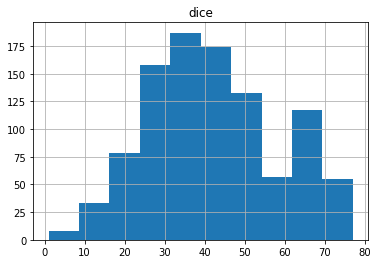

In [60]:
# your code here
age3=pd.read_csv('../data/ages_population3.csv')
age3.rename(columns={'observation':'dice'},inplace=True)
print(feq_dis(age3))
age3.hist()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [61]:
# your code here
print(np.mean(age3))
print(np.std(age3))

dice    41.989
dtype: float64
dice    16.136632
dtype: float64


### Answer 

Even falling both distributions in the same range - 0 to 80, as the present one is less symmetric, it has a mean further to its median slighly skewed to the right. Moreover, the standard deviation is wider, as values are more variable within than range

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [72]:
# your code here
age3=age3.sort_values(by='dice')
x=list(age3['dice'])
print('Quantile 1 is all values below:',Q1(x))
print('Quantile 2 is all values between:',Q1(x), 'and', median1(x))
print('Quantile 3 is all values between:',median1(x), 'and', Q3(x))
print('Quantile 4 is all values above:', Q3(x))
print('Difference between the median and the mean:',median1(x)-mean1(x))

Quantile 1 is all values below: 30.0
Quantile 2 is all values between: 30.0 and 40.0
Quantile 3 is all values between: 40.0 and 53.0
Quantile 4 is all values above: 53.0
Difference between the median and the mean: -1.9889999999999972


### Answer

The central value - median - is below the mean, therefore, this data confirms the fact the dataset values are concentrated to the left and that the dataset has a positive skewness. Also, it is interesting that Q3-Q2 > Q2-Q1, 13>10, which confirms the skewness. Moreover, it is remarkable that being the range exactly (1 to 77) the median is 40, having the half of the values concentrate in 39 lower values and the other half in 37 higher values, and being a 25% of the results concentrated in only 10 values (Q3), while in the other cases they are concentrated in 13, 24 or 30 values. 


#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [86]:
# your code here
print('Percentile 10:',np.percentile(x,10))
print('Percentile 40:',np.percentile(x,40))
print('Percentile 40 - 10:',np.percentile(x,40)-np.percentile(x,10))
print('Percentile 60:',np.percentile(x,60))
print('Percentile 90:',np.percentile(x,90))
print('Percentile 90 - 60:', np.percentile(x,90)-np.percentile(x,60))

Percentile 10: 22.0
Percentile 40: 36.0
Percentile 40 - 10: 14.0
Percentile 60: 45.0
Percentile 90: 67.0
Percentile 90 - 60: 22.0


### Answer

The combination of percetiles yields a insightful conclusion, which is that there must be a sort of tail in the upper values of this dataset, as the values are distributed in a greater range with less frecuency

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [77]:
# your code here
print('First neighbourhood', age1.describe())
print('Second neighbourhood',age2.describe())
print('Third neigbourhood',age3.describe())

First neighbourhood             dice
count  1000.0000
mean     36.5600
std      12.8165
min       1.0000
25%      28.0000
50%      37.0000
75%      45.0000
max      82.0000
Second neighbourhood               dice
count  1000.000000
mean     27.155000
std       2.969814
min      19.000000
25%      25.000000
50%      27.000000
75%      29.000000
max      36.000000
Third neigbourhood               dice
count  1000.000000
mean     41.989000
std      16.144706
min       1.000000
25%      30.000000
50%      40.000000
75%      53.000000
max      77.000000


### Answer

There are several things we can infer from the statistics of these dataset:

- Differences:
    - The First neighbourhood  and the Third neigbourhood seems to be family neighbourhood as there are kinds - min.agen of 1- and elderly - max.age of 82 and 77 and at least the 50% of their population is under 37 and 40 - median, respectively. The Second neighbourhood though, apparently is a young neigbourhood of students and young professionals as the min.age is 19 and the max is 36  
    - The First neighbourhood is the one with more variability in age terms, as it has the higher standard dev. and also shows the highest range of age (82-1=81) and the most relevant quantile width (28,19,8,37) 
    - Contrariwise, the neightbourhood with the less variability is the Second one, as it is refleced in is standard dev., age range (36-19=17) and the less relevant quantile width (25,2,2,7)

- Similarities
    - The 25% of the people that lives in any of this neighbourhoods is un 30 (Q1)